# Model Comparison

### Spatial Regression vs Gradient Boosting Machine

In [88]:
# pkgs
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import os

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

os.chdir('/Users/dangchan/Desktop/Github/LocalSecurity_competition')

In [104]:
# read files
crime = gpd.read_file('data/gdf_crime_SJ.gpkg')
spatial = gpd.read_file('res_spatial.gpkg')
gbm = gpd.read_file('res_gbm.gpkg')

crime = crime[['geometry']]
spatial = spatial[['density', 'geometry']]
gbm = gbm[['density', 'geometry']]

In [105]:
# Density Scaling : minimum Density = 0, sum = 1
spatial.density = (spatial.density - spatial.density.min())
spatial.density = spatial.density / spatial.density.sum()
gbm.density = (gbm.density - gbm.density.min())
gbm.density = gbm.density / gbm.density.sum()

In [150]:
# 각 격자별 포함 범죄개수 정렬
size_spatial = crime.sjoin(spatial).groupby('index_right').size().sort_values(ascending=False)
size_gbm = crime.sjoin(gbm).groupby('index_right').size().sort_values(ascending=False)
size_spatial.name = 'crime'
size_gbm.name = 'crime'

In [151]:
spatial = spatial.join(size_spatial).fillna(0)
gbm = gbm.join(size_gbm).fillna(0)

In [198]:
spatial

,density,geometry,crime
0,0.000009,"POLYGON ((222440.690 323129.334, 222440.171 32...",0.0
1,0.000009,"POLYGON ((222340.133 323228.854, 222339.615 32...",0.0
2,0.000009,"POLYGON ((222440.171 323229.373, 222439.653 32...",0.0
3,0.000066,"POLYGON ((222540.210 323229.891, 222539.692 32...",0.0
4,0.000009,"POLYGON ((222640.249 323230.409, 222639.731 32...",0.0
...,...,...,...
47372,0.000009,"POLYGON ((214648.973 359403.685, 214648.451 35...",0.0
47373,0.000009,"POLYGON ((214749.011 359404.207, 214748.489 35...",0.0
47374,0.000009,"POLYGON ((214849.049 359404.729, 214848.527 35...",0.0
47375,0.000009,"POLYGON ((214949.087 359405.251, 214948.565 35...",0.0


In [266]:
spatial_d = spatial.sort_values('density', ascending=False).drop('geometry', axis=1).cumsum().reset_index(drop=True)
gbm_d = gbm.sort_values('density', ascending=False).drop('geometry', axis=1).cumsum().reset_index(drop=True)

In [267]:
spatial_c = spatial.sort_values('crime', ascending=False).drop('geometry', axis=1).cumsum().reset_index(drop=True)
gbm_c = gbm.sort_values('crime', ascending=False).drop('geometry', axis=1).cumsum().reset_index(drop=True)

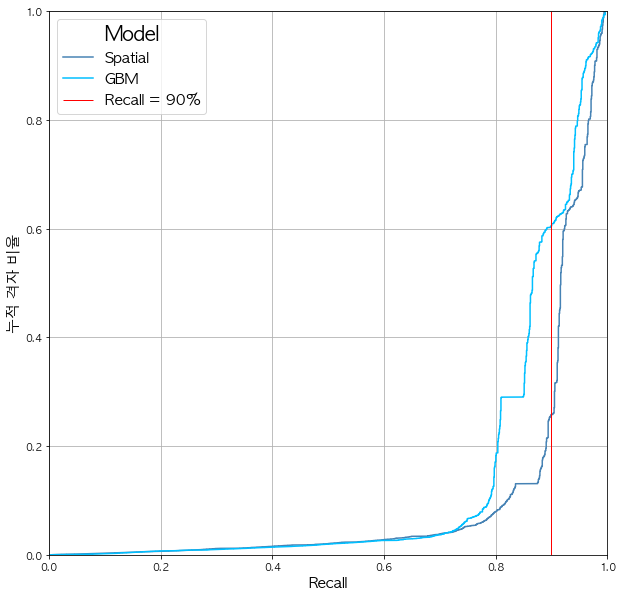

In [282]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot(spatial_d.crime/len(crime), np.linspace(0,1, len(spatial)), color='steelblue', label='Spatial')
ax.plot(gbm_d.crime/len(crime), np.linspace(0,1, len(gbm)), color='deepskyblue', label='GBM')
ax.vlines(x=0.9, ymin=0, ymax=1, linewidth=1.0, color='red', label = 'Recall = 90%')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Recall', fontsize=15)
plt.ylabel('누적 격자 비율', fontsize=15)
plt.legend(title='Model', fontsize=15, title_fontsize=20)
plt.grid()
plt.show()

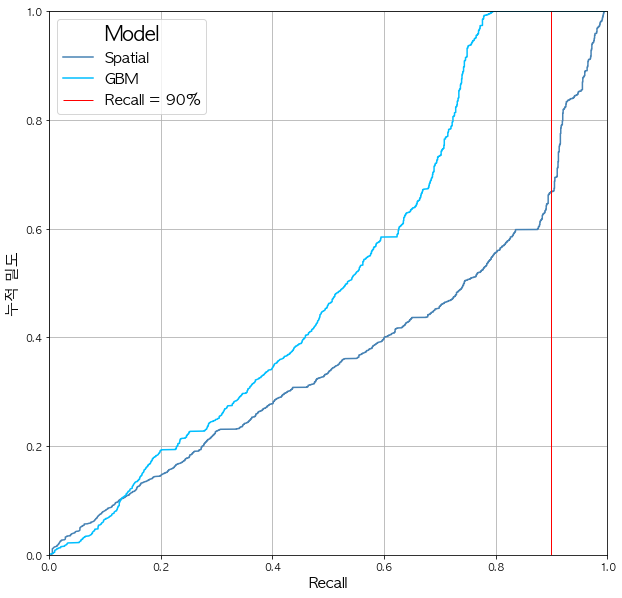

In [283]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot(spatial_d.crime/len(crime), spatial_d.density, color='steelblue', label='Spatial')
ax.plot(gbm_d.crime/len(crime), gbm_d.density, color='deepskyblue', label='GBM')
ax.vlines(x=0.9, ymin=0, ymax=1, linewidth=1.0, color='red', label = 'Recall = 90%')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('Recall', fontsize=15)
plt.ylabel('누적 밀도', fontsize=15)
plt.legend(title='Model', fontsize=15, title_fontsize=20)
plt.grid()
plt.show()

In [278]:
print(len(spatial_d[spatial_d.crime < 1276]) + 1)
print((len(spatial_d[spatial_d.crime < 1276]) + 1) / len(spatial))

12220
0.2579310635962598


In [279]:
print(len(gbm_d[gbm_d.crime < 1276]) + 1)
print((len(gbm_d[gbm_d.crime < 1276]) + 1) / len(spatial))

28635
0.6044072018067839
